In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
import math

# Numerical Root finding
1. Bisection Method
2. Fixed Point iteration
3. Newton Method
4. Secant Method 
5. False Position Method 

## Q1 Given $x^3 =9$ , apply two steps of bisection method with starting interval \[2,3\]

Transform into $f(x) = x^3 - 9 = 0$ to find the root

Tolerance - $0.0001$

Root :  2.0800838230497902


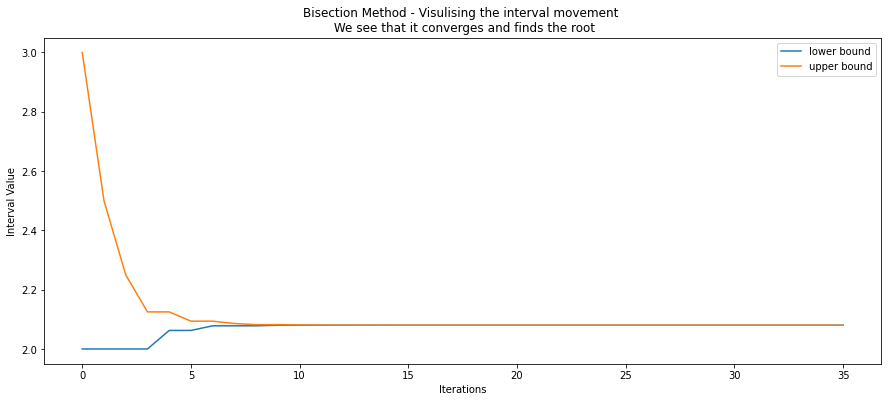

In [43]:
#inital conditions
tolerance = 1e-10
lower_interval = 2
upper_interval = 3
mid_fn_value = 10 #to trigger the while loop

#array for visualisations
lower_array = []
upper_array = []

def equation(x):
    return x**3 -9

while abs(mid_fn_value) > tolerance:
    lower_array.append(lower_interval)
    upper_array.append(upper_interval)
    mid_point = (lower_interval+upper_interval) / 2
    mid_fn_value = equation(mid_point)

    if mid_fn_value > 0:
        upper_interval = mid_point
    else:
        lower_interval = mid_point
print("Root : ",mid_point)

plt.figure(figsize=(15,6))
plt.plot(lower_array,label="lower bound")
plt.plot(upper_array,label="upper bound")
plt.legend(loc=0)
plt.ylabel("Interval Value")
plt.xlabel("Iterations")
plt.title("Bisection Method - Visulising the interval movement \n We see that it converges and finds the root")
plt.show()

## Q2. Given $x^4-x^2+x-1=0$, apply newton's method to find the root with initial guess $x_0=0$

The given function is already in the root finding form.

Getting the derivative, $f'(x) = 4x^3-2x+1$

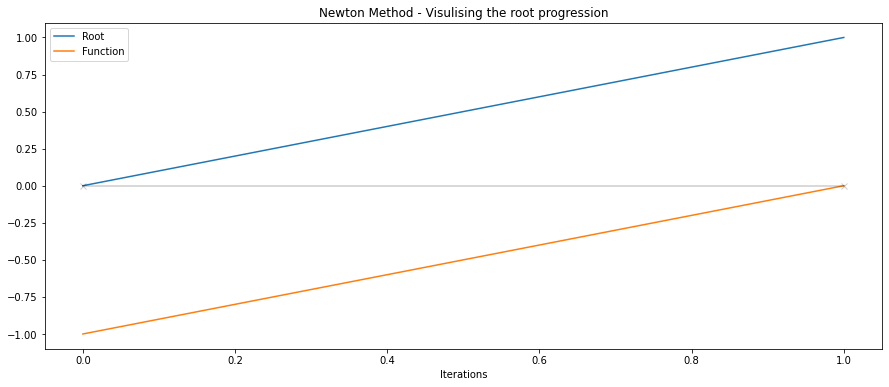

In [42]:
#initial conditions
tolerance = 1e-10
x = 0
function_value = 10

#array for visualisation
root_array = []
fn_value_array = []

def derivative(x):
    return 4*x**3 - 2*x +1 

def equation(x):
    return x**4 - x**2 + x - 1

while abs(function_value) > tolerance: 
    root_array.append(x)
    function_value = equation(x)
    fn_value_array.append(function_value)
    x = x - function_value/derivative(x)

plt.figure(figsize=(15,6))
plt.plot(root_array,label="Root")
plt.plot(fn_value_array,label="Function")
plt.plot([0 for i in range(len(root_array))],alpha=0.2,c="black",marker="x")
plt.legend(loc=0)
plt.xlabel("Iterations")
plt.title("Newton Method - Visulising the root progression")
plt.show()

## Q3. Apply two steps of Secant method to the following problem with initial guess $x_0=1$ and $x_1=2$

Given function - $e^x + x = 7$,
We transform it into $e^x + x - 7 = 0$ to find the root.

Secant method assumes that the function is unknown and therefore we apply forward difference to obtain an approximate of the 1st derivative.

$\frac {dy} {dx}$ = $\frac {f(x_1) -f(x)} {x_1-x}$


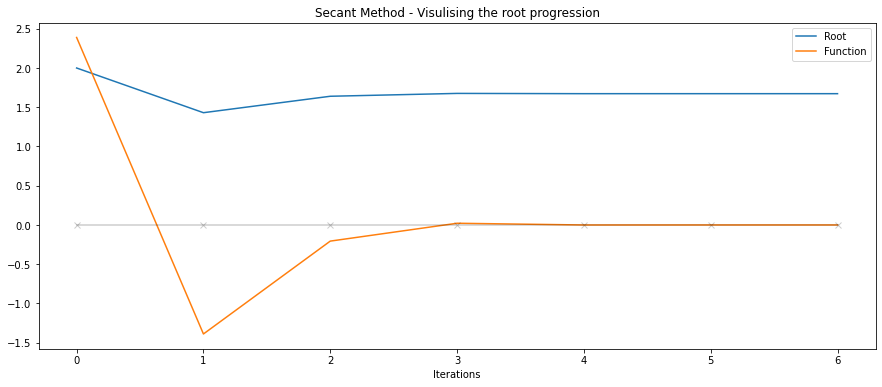

In [41]:
#inital conditions
x_previous = 0
x_next = 2
tolerance = 1e-10
function_value = 10

#array for visualisation
root_array = []
fn_value_array = []

def equation(x):
    return math.exp(x) + x - 7

def derivative_estimate(x_prev,x_next):
    #using forward difference
    return (equation(x_next)-equation(x_prev)) / (x_next-x_prev)

while abs(function_value) > tolerance:
    function_value = equation(x_next)
    root_array.append(x_next)
    fn_value_array.append(function_value)
    temp_x_next = x_next
    x_next = x_next - equation(x_next)/derivative_estimate(x_next,x_previous)
    x_previous = temp_x_next

plt.figure(figsize=(15,6))
plt.plot(root_array,label="Root")
plt.plot(fn_value_array,label="Function")
plt.plot([0 for i in range(len(root_array))],alpha=0.2,c="black",marker="x")
plt.legend(loc=0)
plt.xlabel("Iterations")
plt.title("Secant Method - Visulising the root progression")
plt.show()

## Q4. Apply two steps of false position method to the following problem with initial guess $x_0=1$ and $x_1=2$

Given function - $e^x + \sin(x) = 4$,
We transform it into $e^x + \sin(x) - 4 = 0$ to find the root.

False position method - $c = \frac {bf(a)-af(b)} {a-b}$

Root :  1.1299804986282558


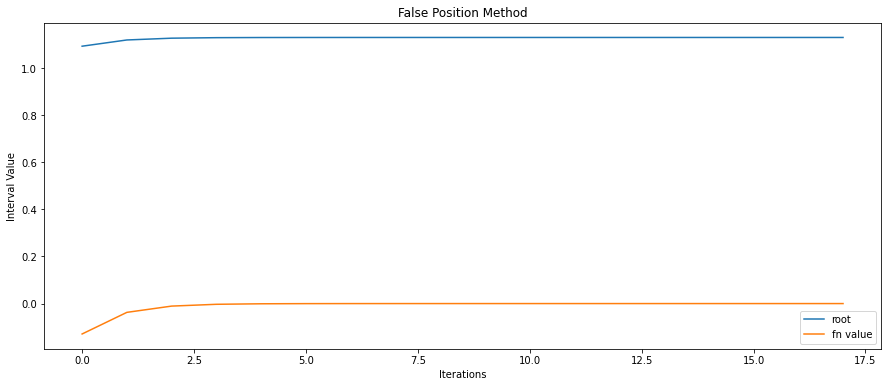

In [69]:
#inital conditions
tolerance = 1e-10
lower_interval = 1
upper_interval = 2
mid_fn_value = 10 #to trigger the while loop

#array for visualisations
root_array = []
fn_value_array = []

def equation(x):
    return math.exp(x) + math.sin(x) - 4 

def false_position(a,b):
    numerator = b*equation(a) - a*equation(b)
    denominator = equation(a)-equation(b)
    return numerator/denominator

while abs(mid_fn_value) > tolerance:
    mid_point = false_position(lower_interval,upper_interval)
    mid_fn_value = equation(mid_point)
    root_array.append(mid_point)
    fn_value_array.append(equation(mid_point))
    if mid_fn_value > 0:
        upper_interval = mid_point
    else:
        lower_interval = mid_point

print("Root : ",mid_point)

plt.figure(figsize=(15,6))
plt.plot(root_array,label="root")
plt.plot(fn_value_array,label="fn value")
plt.legend(loc=0)
plt.ylabel("Interval Value")
plt.xlabel("Iterations")
plt.title("False Position Method")
plt.show()

## Assignment 4, Q10. Given $\sin(x)= 5x+5$,

a. Express the given equation as a fixed point problem $x=g(x)$ <br>
Answer: $g(x) = \frac {sinx-5} {5}$
<br><br>
b. Apply three steps of fixed point iteration on this problem with initial guess $x_0 = 0$  <br>
c. Decide if the fixed point iteration is locally convergent to the fixed point. <br>
For this, we can check the derivative if it's $abs(f'(x))$< 1 

Root :  1.1299804986282558


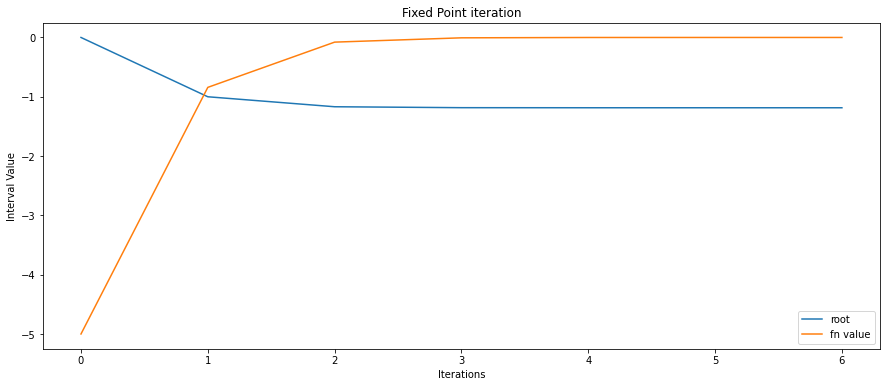

In [70]:
#inital conditions
tolerance = 1e-5
x = 0 #init guess
fn_value = 10 #to trigger the while loop

#array for visualisations
root_array = []
fn_value_array = []

def g_(x):
    return (math.sin(x)-5) / 5

def fn(x):
    return math.sin(x)-5*x-5

while abs(fn_value) > tolerance:
    fn_value = fn(x)
    fn_value_array.append(fn_value)
    root_array.append(x)
    x = g_(x)

print("Root : ",mid_point)

plt.figure(figsize=(15,6))
plt.plot(root_array,label="root")
plt.plot(fn_value_array,label="fn value")
plt.legend(loc=0)
plt.ylabel("Interval Value")
plt.xlabel("Iterations")
plt.title("Fixed Point iteration")
plt.show()

# Numerical Integration

1. Trapeziod Rule
2. Simpson's 1/3 and 3/8 Rule
3. Mid Point Rule

## Assignment 5, Q5. Apply the composite trapezoid rule with n=1,n=2 and n=4 intervals to approximate the following integral.

$\int_{0}^{\pi/2} \cos(x) dx$

In [113]:
def fn(x):
    return math.cos(x)

def trapezoid(a,b,step_size):
    return (fn(a)+fn(b))/2 * step_size

def trapezoid_integration(a,b,intervals):
    area_under_curve = 0
    x = np.linspace(a,b,intervals+1)
    for i in range(len(x)-1):
        step_size = x[i+1] - x[i]
        lower = x[i]
        upper = x[i+1]
        area_under_curve+=(trapezoid(lower,upper,step_size))
    return area_under_curve

#inital conditions
a = 0
b = math.pi/2

print("Answer for n=1:",trapezoid_integration(a,b,1))
print("Answer for n=2:",trapezoid_integration(a,b,2))
print("Answer for n=4:",trapezoid_integration(a,b,4))

Answer for n=1: 0.7853981633974483
Answer for n=2: 0.9480594489685199
Answer for n=4: 0.9871158009727755


## Assignment 5, Q6. Apply the composite midpoint rule with n=1,n=2 and n=4 intervals to approximate the following integral.

$\int_{0}^{\pi/2} \cos(x) dx$

In [114]:
def fn(x):
    return math.cos(x)

def midpoint(a,b,step_size):
    return fn((a+b)/2) * step_size

def midpoint_integration(a,b,intervals):
    area_under_curve = 0
    x = np.linspace(a,b,intervals+1)
    for i in range(len(x)-1):
        step_size = x[i+1] - x[i]
        lower = x[i]
        upper = x[i+1]
        area_under_curve+=(midpoint(lower,upper,step_size))
    return area_under_curve

#inital conditions
a = 0
b = math.pi/2

print("Answer for n=1:",midpoint_integration(a,b,1))
print("Answer for n=2:",midpoint_integration(a,b,2))
print("Answer for n=4:",midpoint_integration(a,b,4))

Answer for n=1: 1.1107207345395915
Answer for n=2: 1.026172152977031
Answer for n=4: 1.006454542799564


## Ex 8, Q6. Apply the composite Simpson's 1/3 rule with n=1,n=2 and n=4 intervals to approximate the following interval.

$\int_{0}^{\pi/2} \cos(x) dx$

Approximate is given by $\approx \frac h 3 [f(x_0) + 4f(x_1) + f(x_2)]$

In [149]:
def fn(x):
    return math.cos(x)

def simpson_13(a,b,c,step_size):
    return (step_size/2)/3 * (fn(a)+4*fn(b)+fn(c))

def simpson_13_integration(a,b,intervals):
    area_under_curve = 0
    if intervals > 1:
        x = np.linspace(a,b,intervals*3+1)
    else:
        x = np.linspace(a,b,intervals*3)
    for i in range(0,len(x)-2,2):
        lower = x[i]
        mid = x[i+1]
        upper = x[i+2]
        step_size = upper - lower
        area_under_curve+=simpson_13(lower,mid,upper,step_size)
    return area_under_curve

#inital conditions
a = 0
b = math.pi/2

print("Answer for n=1:",simpson_13_integration(a,b,1))
print("Answer for n=2:",simpson_13_integration(a,b,2))
print("Answer for n=4:",simpson_13_integration(a,b,4))

Answer for n=1: 1.0022798774922104
Answer for n=2: 1.0000263121705928
Answer for n=4: 1.0000016344385798
